In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('retail_raw_reduced.csv')

# Mengubah kolom order_date menjadi tipe datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Filter data untuk bulan Desember 2019
dataset_december = df[(df['order_date'].dt.month == 12) & (df['order_date'].dt.year == 2019)]

**Jumlah pembeli harian (daily number of customers)
selama bulan Desember.**



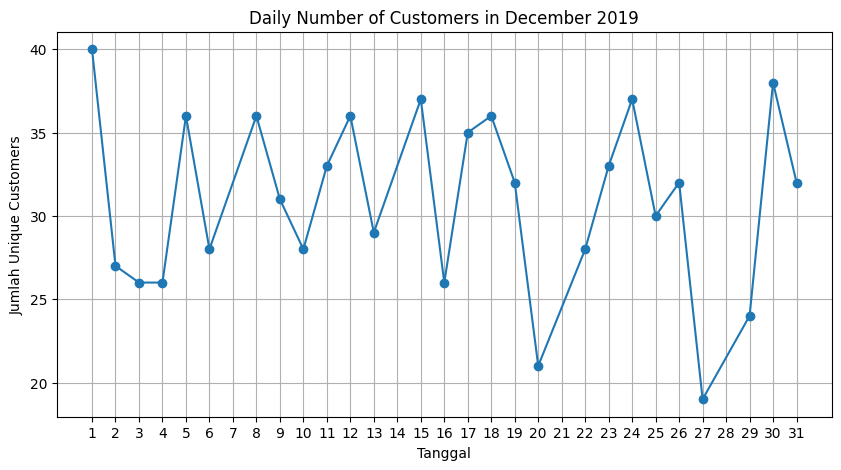

In [35]:
# Jumlah pembeli harian (daily number of customers)selama bulan Desember.

# Menghitung jumlah unique customers di tiap tanggal
daily_customers = dataset_december.groupby(dataset_december['order_date'].dt.day)['customer_id'].nunique()

# Membuat line chart jumlah unique customers
plt.figure(figsize=(10, 5))
plt.plot(daily_customers.index, daily_customers.values, marker='o')
plt.title('Daily Number of Customers in December 2019')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Unique Customers')
plt.xticks(range(1, 32))
plt.grid(True)
plt.show()


**Case 1:**

In [36]:
#Case 1
# Menghitung total kuantitas penjualan per brand di bulan Desember 2019
top5_brands = dataset_december.groupby('brand')['quantity'].sum().nlargest(5)

# Membuat variabel dataset_top5brand_dec yang berisi data penjualan bulan Desember 2019 hanya untuk top 5 brand
dataset_top5brand_dec = dataset_december[dataset_december['brand'].isin(top5_brands.index)]

# Menampilkan top 5 brands beserta quantity terjual
print("Top 5 brands berdasarkan quantity terjual di bulan Desember 2019:")
for i, (brand, quantity) in enumerate(zip(top5_brands.index, top5_brands.values), 1):
    print(i, ".", brand, "(quantity:", quantity, ")")

Top 5 brands berdasarkan quantity terjual di bulan Desember 2019:
1 . BRAND_S (quantity: 2197 )
2 . BRAND_P (quantity: 2194 )
3 . BRAND_R (quantity: 1508 )
4 . BRAND_C (quantity: 1365 )
5 . BRAND_A (quantity: 1315 )


**Case 2: Multi-line chart daily quantity untuk brand top 5**

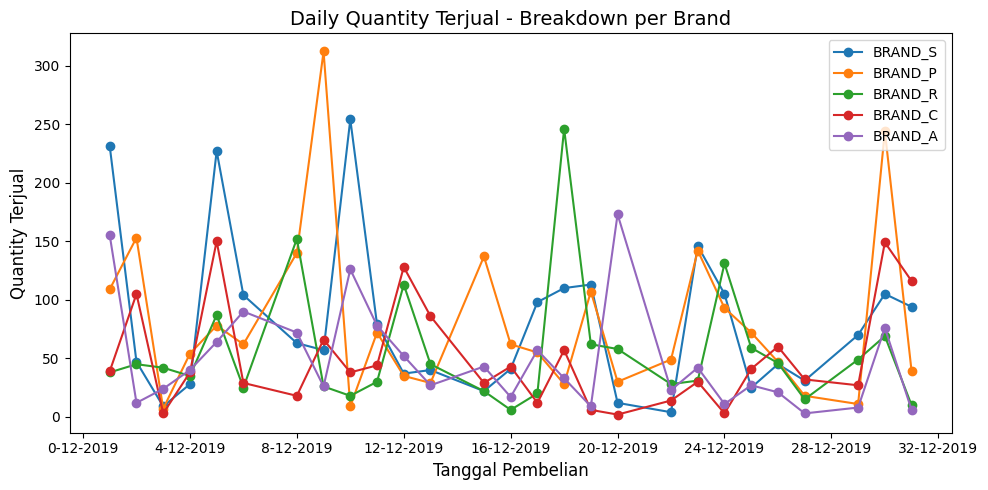

In [40]:
#Case 2

# Group data berdasarkan tanggal dan brand, lalu hitung jumlah quantity
daily_quantity = dataset_december.groupby(['order_date', 'brand'])['quantity'].sum().unstack()

# Filter data untuk top 5 brand dengan jumlah quantity tertinggi
top_5_brands = daily_quantity.sum().nlargest(5).index
daily_quantity_top5 = daily_quantity[top_5_brands]

# Menggambar multi-line chart
fig, ax = plt.subplots(figsize=(10, 5))

for column in daily_quantity_top5.columns:
    ax.plot(daily_quantity_top5.index.day, daily_quantity_top5[column], marker='o', label=column)

# Mencari tanggal dengan lonjakan (jumlah quantity terjual paling tinggi)
date_of_spike = daily_quantity_top5.sum(axis=1).idxmax()
max_quantity = daily_quantity_top5.sum(axis=1).max()

# Menambahkan anotasi untuk titik lonjakan
ax.annotate('Lonjakan', xy=(date_of_spike.day, max_quantity), xytext=(date_of_spike.day, max_quantity + 5),
            arrowprops=dict(facecolor='yellow', arrowstyle='->'))

# Menambahkan judul dan label sumbu
ax.set_title('Daily Quantity Terjual - Breakdown per Brand', fontsize=14)
ax.set_xlabel('Tanggal Pembelian', fontsize=12)
ax.set_ylabel('Quantity Terjual', fontsize=12)

# Menampilkan legenda
ax.legend()

# Mengatur format tanggal pada sumbu x
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x)}-12-2019'))

# Menampilkan chart
plt.tight_layout()
plt.show()


**Case 3:**

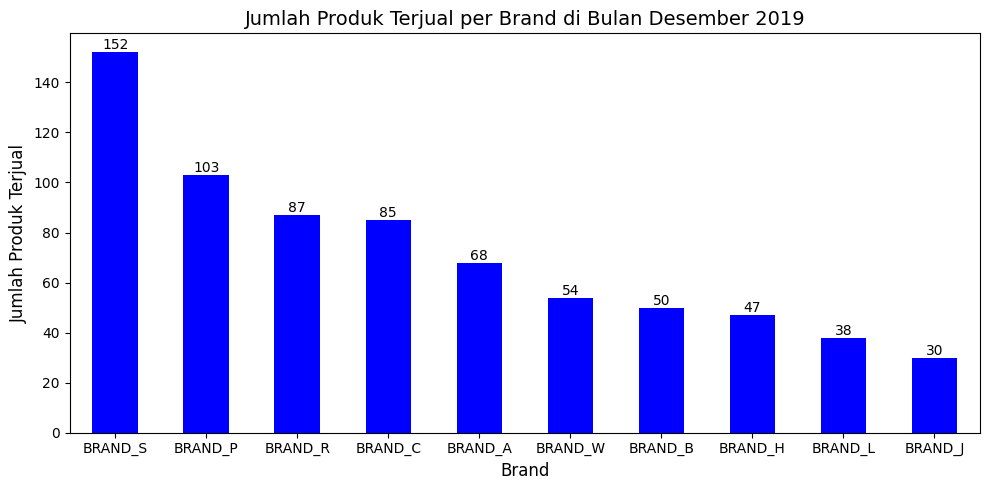

In [41]:
#Case 3

# Menghitung jumlah produk terjual untuk setiap merek (brand) dan mengurutkannya
brand_product_count = dataset_december.groupby('brand')['product_id'].nunique()
brand_product_count_sorted = brand_product_count.sort_values(ascending=False)

# Menampilkan jumlah produk terjual per brand di bulan Desember 2019 dalam bentuk bar chart
plt.figure(figsize=(10, 5))
brand_product_count_sorted.plot(kind='bar', color='blue')

# Mengatur judul dan label sumbu
plt.title('Jumlah Produk Terjual per Brand di Bulan Desember 2019', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Jumlah Produk Terjual', fontsize=12)


# Mengatur miring (diagonal) untuk label brand
plt.xticks(rotation=0, ha='center')

# Menampilkan nilai di atas setiap bar
for i, value in enumerate(brand_product_count_sorted.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# Menampilkan bar chart
plt.tight_layout()
plt.show()


**Case 4: Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019**

<ipython-input-43-bd1887c0f895>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_december['sales_category'] = dataset_december['quantity'].apply(lambda x: '>=100' if x >= 100 else '<100')


<Figure size 1000x500 with 0 Axes>

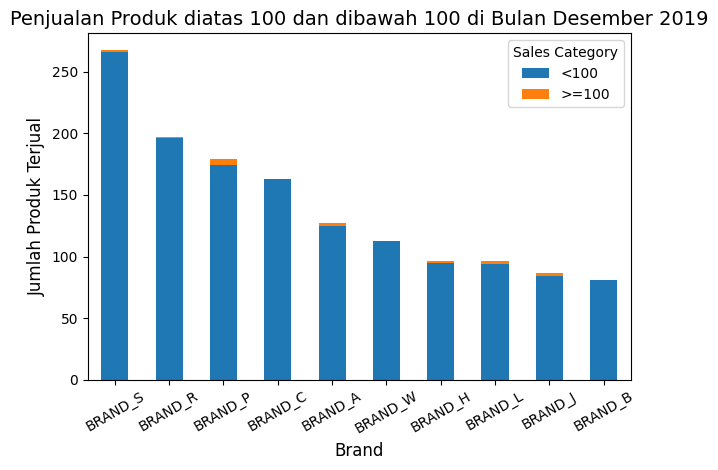

In [43]:
#Case 4

# Menghitung jumlah produk terjual per brand
brand_product_count = dataset_december.groupby('brand')['product_id'].count()

# Membuat kolom baru untuk kategori penjualan (>=100 atau <100)
dataset_december['sales_category'] = dataset_december['quantity'].apply(lambda x: '>=100' if x >= 100 else '<100')

# Menghitung jumlah produk terjual per brand dan kategori penjualan
brand_sales_category_count = dataset_december.groupby(['brand', 'sales_category']).size().unstack()

# Mengurutkan brand berdasarkan jumlah produk terjual secara keseluruhan
brand_sales_category_count = brand_sales_category_count.reindex(brand_product_count.sort_values(ascending=False).index)

# Membuat stacked chart
plt.figure(figsize=(10, 5))
brand_sales_category_count.plot(kind='bar', stacked=True)

# Mengatur miring (diagonal) untuk label brand
plt.xticks(rotation=30, ha='center')

# Mengatur judul dan label sumbu
plt.title('Penjualan Produk diatas 100 dan dibawah 100 di Bulan Desember 2019', fontsize=14)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Jumlah Produk Terjual', fontsize=12)

# Menampilkan legenda
plt.legend(title='Sales Category')

# Menampilkan stacked chart
plt.tight_layout()
plt.show()


**Case 5: Murah atau mahalkah harga produk brand top 5**

Data Brand dan Median Harga:
Brand: BRAND_A
Median Harga: 450000.0
Brand: BRAND_C
Median Harga: 583000.0
Brand: BRAND_P
Median Harga: 590000.0
Brand: BRAND_R
Median Harga: 740000.0
Brand: BRAND_S
Median Harga: 551500.0


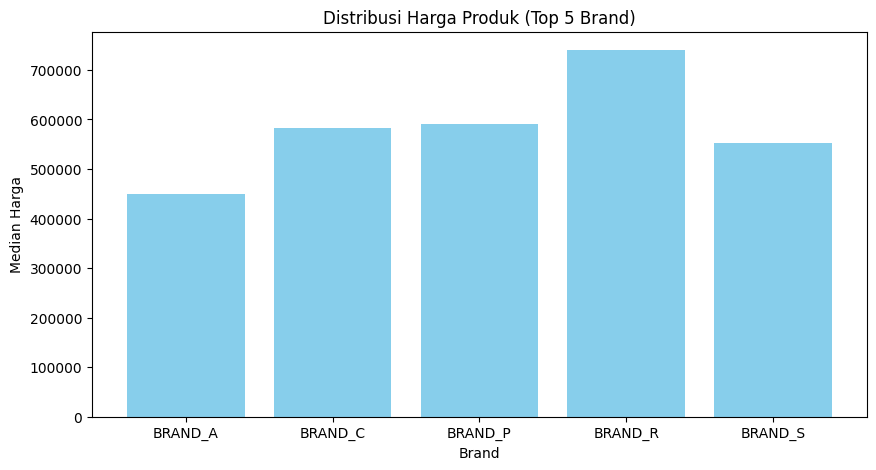


jika dilihat dari median harga, dapat dikatakan bahwa  BRAND_A memiliki harga produk yang lebih murah  dibandingkan dengan brand lainnya, 
 sedangkan BRAND_R  memiliki harga produk yang lebih mahal dibandingkan dengan brand lainnya.


In [46]:
# Case 5
# Menghitung median harga produk untuk setiap product_id dalam dataset_top5brand_dec
median_harga_produk = dataset_top5brand_dec.groupby('brand')['item_price'].median()

plt.figure(figsize=(10, 5))
plt.bar(median_harga_produk.index, median_harga_produk.values, color='skyblue')

# Mengatur label dan judul
plt.xlabel('Brand')
plt.ylabel('Median Harga')
plt.title('Distribusi Harga Produk (Top 5 Brand)')

# Menampilkan data brand dan median harganya
print("Data Brand dan Median Harga:")
for brand, median_harga in median_harga_produk.items():
    print("Brand:", brand)
    print("Median Harga:", median_harga)
# Menampilkan histogram
plt.show()



brand_termurah = median_harga_produk.idxmin()
brand_termahal = median_harga_produk.idxmax()
print()
print("jika dilihat dari median harga, dapat dikatakan bahwa ",brand_termurah,  "memiliki harga produk yang lebih murah  dibandingkan dengan brand lainnya, \n sedangkan", brand_termahal," memiliki harga produk yang lebih mahal dibandingkan dengan brand lainnya.")


**Case 6a: Korelasi quantity vs GMV**

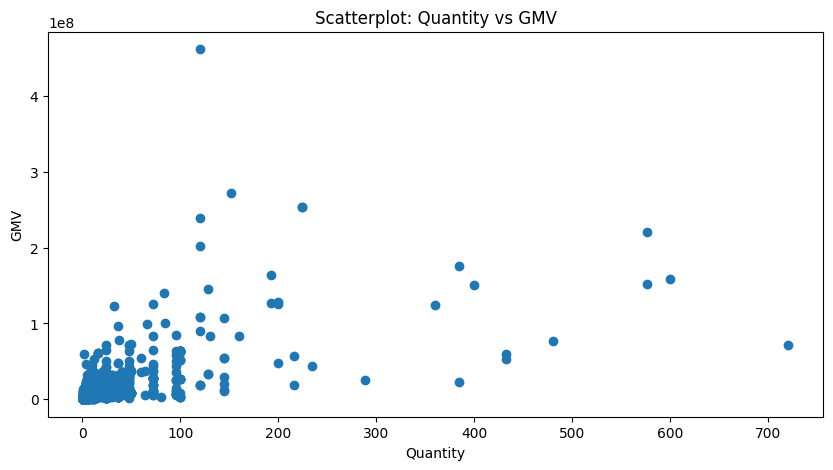

Korelasi antara quantity dan GMV: 0.6269420804799786


In [47]:
#Case 6a

# Menghitung GMV (quantity * item_price)
df['GMV'] = df['quantity'] * df['item_price']

# Korelasi quantity vs GMV
plt.figure(figsize=(10, 5))
plt.scatter(df['quantity'], df['GMV'])
plt.xlabel('Quantity')
plt.ylabel('GMV')
plt.title('Scatterplot: Quantity vs GMV')
plt.show()

correlation_quantity_gmv = df['quantity'].corr(df['GMV'])
print("Korelasi antara quantity dan GMV:", correlation_quantity_gmv)

**Case 6b: Korelasi median harga vs quantity**

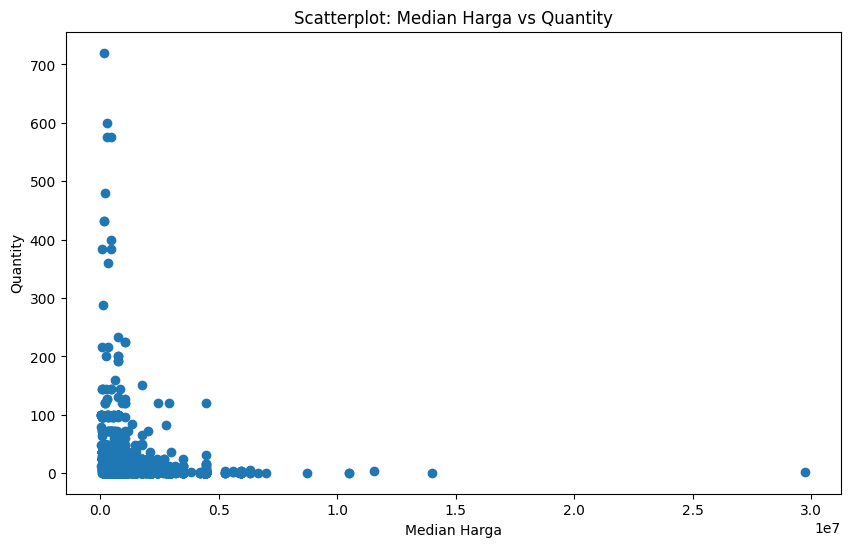

Korelasi antara median harga dan quantity: -0.12280868707213452


In [48]:
#Case 6b
#Median harga vs quantity
median_harga = df.groupby('product_id')['item_price'].median()

df['median_harga'] = df['product_id'].map(median_harga)

plt.figure(figsize=(10, 6))
plt.scatter(df['median_harga'], df['quantity'])
plt.xlabel('Median Harga')
plt.ylabel('Quantity')
plt.title('Scatterplot: Median Harga vs Quantity')
plt.show()

correlation_medianharga_quantity = df['median_harga'].corr(df['quantity'])
print("Korelasi antara median harga dan quantity:", correlation_medianharga_quantity)

